In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
import numpy as np

In [23]:
movie = pd.read_csv('../data/movie.csv')

In [24]:
med_budget = movie.groupby('title_year')['budget'].median() / 1e6

In [25]:
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()

In [26]:
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

In [27]:
years = med_budget_roll.index.values

In [28]:
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [29]:
budget = med_budget_roll.values

In [30]:
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

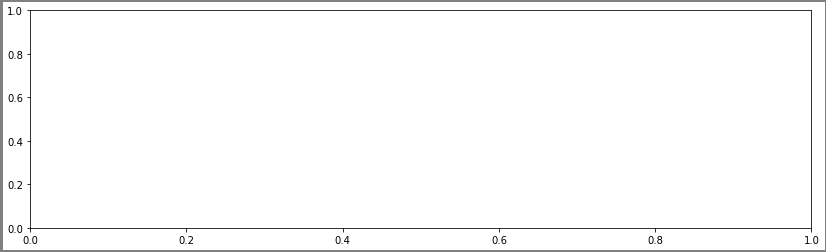

In [31]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5,
 edgecolor='.5')


In [32]:
ax.plot(years, budget, linestyle='--',
 linewidth=3, color='.2', label='All Movies')

In [33]:
text_kwargs=dict(fontsize=20, family='cursive')

In [34]:
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

Text(3.200000000000003, 0.5, 'Millions of Dollars')

In [35]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

In [36]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

In [37]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()


In [38]:
fifth_year = (years % 5 == 0) & (years >= 1970)

In [39]:
years_5 = years[fifth_year]

In [40]:
ct_5 = ct[fifth_year]

In [42]:
ct_norm_5 = ct_norm[fifth_year]

In [43]:
ax.bar(years_5, ct_norm_5, 3, facecolor='.5',
 alpha=.3, label='Movies per Year')


<BarContainer object of 10 artists>

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


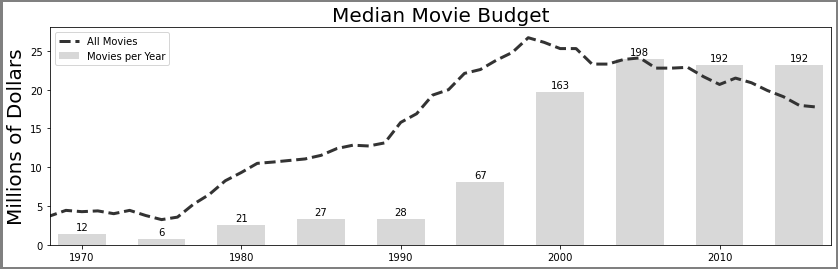

In [47]:
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig